In [1]:
import time
import numpy as np
import cv2

from PIL import Image
from _models.vgg_fer import VGGFerModel
from matplotlib import pyplot as plt

In [2]:
def benchmark_model(model, sample, iterations=200):
    """Test inference time of the model."""
    model.predict(sample) # warm-up inference
    inference_times = []
    for i in range(iterations):
        start = time.time()
        model.predict(sample)
        inference_times.append(time.time() - start)
    mean_time = np.mean(inference_times)
    median_time = np.median(inference_times)
    plt.plot(inference_times)
    plt.title(f'Inference time over {iterations} iterations on one picture\n'
              f'mean time = {mean_time:.3f}sec, median time = {median_time:.3f}sec')
    plt.xlabel('Iteration number')
    plt.ylabel('Inference time, sec')
    plt.show()
    return mean_time, median_time

In [3]:
# model itialize
model = VGGFerModel()

In [4]:
# load sample image for benchmark
img = Image.open('./test_foto/anger.jpg')
img = np.array(img)

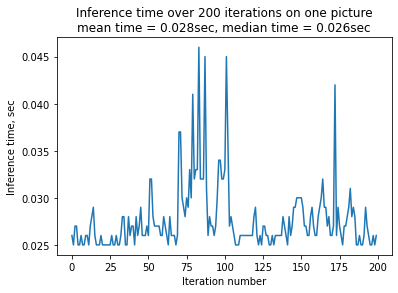

(0.027709999084472657, 0.026499152183532715)

In [6]:
# model benchmark
benchmark_model(model, img)